Import Library Yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install Sastrawi
!pip install tensorflow scikit-learn
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


Tahap Preprocessing

In [ ]:
dataDoc = pd.read_excel('datasetstk.xlsx', header=0)
dataDoc

,review_id,review_text,kelas
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1
1,838,"ini enak banget dipakainya, enteng banget diwa...",0
2,1166,the description is quite right. produk ini ema...,0
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1
4,1526,"kemasannya oke, seperti lotion citra pada umum...",0
...,...,...,...
494,14039,agak kecewa sama lotion yang ini. berharap ba...,0
495,14778,dulu selalu pake ini untukk sehari harii sayan...,0
496,15484,sunblock ini mahal banget menurutku. tapi hasi...,-1
497,15615,pernah pakai ini dan hasilnya sama aja seperti...,0


In [ ]:
# Casefolding
def case_lower(lowercase):
    lowercase = lowercase.lower() #Lowercase Teks
    return lowercase

dataDoc['Case Folding']= dataDoc['review_text'].apply(case_lower)
DocCaseFolda = pd.DataFrame(dataDoc['Case Folding'])
DocCaseFolda

,Case Folding
0,sunscreen termahal yang pernah gue beli ini ka...
1,"ini enak banget dipakainya, enteng banget diwa..."
2,the description is quite right. produk ini ema...
3,bisa untuk wajah dan badan dengan harga yang s...
4,"kemasannya oke, seperti lotion citra pada umum..."
...,...
494,agak kecewa sama lotion yang ini. berharap ba...
495,dulu selalu pake ini untukk sehari harii sayan...
496,sunblock ini mahal banget menurutku. tapi hasi...
497,pernah pakai ini dan hasilnya sama aja seperti...


In [ ]:
# Stopword
stopword = set(stopwords.words('indonesian'))

def clean_stopwords(teks):
    teks = ' '.join(word for word in teks.split() if word not in stopword) # Menghapus Stopword dari kolom berita
    return teks

dataDoc['Stopwords'] = dataDoc['Case Folding'].apply(clean_stopwords)
Stopword = pd.DataFrame(dataDoc['Stopwords'])
Stopword


,Stopwords
0,sunscreen termahal gue beli kayanya. but it's ...
1,"enak banget dipakainya, enteng banget diwajah,..."
2,the description is quite right. produk emang c...
3,wajah badan harga affordable! dipakai wajah ok...
4,"kemasannya oke, lotion citra umumnya. versi un..."
...,...
494,kecewa lotion ini. berharap kecewa. teksturnya...
495,pake untukk sehari harii sayangg berminyakk kl...
496,sunblock mahal banget menurutku. hasilnya oke....
497,pakai hasilnya aja lotion vaseline. beli dibil...


In [ ]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def sastrawi_stemmer(teks):
    teks=' '.join(stemmer.stem(word) for word in teks.split() if word in teks)
    return teks

dataDoc['Stemming Sastrawi'] = dataDoc['Stopwords'].apply(sastrawi_stemmer)
Hasil_Sastrawi = pd.DataFrame(dataDoc['Stemming Sastrawi'])
Hasil_Sastrawi


,Stemming Sastrawi
0,sunscreen mahal gue beli kaya but it s worth i...
1,enak banget pakai enteng banget wajah lengket ...
2,the description is quite right produk emang co...
3,wajah badan harga affordable pakai wajah oksid...
4,kemas oke lotion citra umum versi unik susah d...
...,...
494,kecewa lotion ini harap kecewa tekstur cair ga...
495,pake untukk hari hari sayangg berminyakk klo p...
496,sunblock mahal banget turut hasil oke gak biki...
497,pakai hasil aja lotion vaseline beli bilang se...


In [ ]:
#Gabung Ke Excel

hasil_stemming = pd.Series(dataDoc['Stemming Sastrawi'])
data_clean_kelas = pd.Series(dataDoc['kelas'])


df = pd.DataFrame({

    'ulasan' : hasil_stemming,
    'kelas' : data_clean_kelas,
})

hasil_bag_a = df.to_excel('datapreprocessing.xlsx', sheet_name='datapreprocessing')
df

,ulasan,kelas
0,sunscreen mahal gue beli kaya but it s worth i...,-1
1,enak banget pakai enteng banget wajah lengket ...,0
2,the description is quite right produk emang co...,0
3,wajah badan harga affordable pakai wajah oksid...,1
4,kemas oke lotion citra umum versi unik susah d...,0
...,...,...
494,kecewa lotion ini harap kecewa tekstur cair ga...,0
495,pake untukk hari hari sayangg berminyakk klo p...,0
496,sunblock mahal banget turut hasil oke gak biki...,-1
497,pakai hasil aja lotion vaseline beli bilang se...,0


ANN/SVM, TF/TFIDF, Filter, dan Evaluasi

In [ ]:
# Pencarian Max Features Terbaik TFIDF

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  # Ganti dengan model yang sesuai

# Load data from datapreprocessing.xlsx
df = pd.read_excel("datapreprocessing.xlsx")

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['ulasan'], df['kelas'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and a classifier (replace SVC with your desired classifier)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', SVC())  # Ganti dengan model yang sesuai
])

# Parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000]  # Ganti dengan nilai-nilai yang ingin diuji
}

# GridSearchCV for finding the best max_features
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_data, train_labels)

# Print the results
print("Best max_features:", grid_search.best_params_['tfidf__max_features'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(test_data, test_labels)
print("Test set accuracy:", test_accuracy)

Best max_features: 1000
Best cross-validation accuracy: 0.6166455696202531
Test set accuracy: 0.7


In [ ]:
# TF dan ANN menggunakan Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam

# Load data from datapreprocessing.xlsx
df = pd.read_excel("datapreprocessing.xlsx")

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['ulasan'], df['kelas'], test_size=0.3, random_state=42)

# TF Vectorization
tf_vectorizer = CountVectorizer()
tf_train = tf_vectorizer.fit_transform(train_data)
tf_test = tf_vectorizer.transform(test_data)

# Convert sparse matrix to dense NumPy array
tf_train_dense = tf_train.toarray()
tf_test_dense = tf_test.toarray()

# Check for class imbalance and compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights))

# Map class labels to the range [0, num_classes-1]
class_mapping = {label: idx for idx, label in enumerate(np.unique(train_labels))}
train_labels_mapped = train_labels.map(class_mapping)
test_labels_mapped = test_labels.map(class_mapping)

# Build a simplified Neural Network model for backpropagation
model = Sequential()
model.add(Dense(128, input_shape=(tf_train_dense.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neurons for 3 classes

# Compile the model with appropriate parameters
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'], weighted_metrics=[])

# Training
model.fit(
    tf_train_dense, train_labels_mapped,
    epochs=10, batch_size=32,
    validation_split=0.1,
    sample_weight=np.array([class_weight_dict[label] for label in train_labels_mapped]),
    verbose=2
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(tf_test_dense, test_labels_mapped, verbose=0, sample_weight=np.array([class_weight_dict[label] for label in test_labels_mapped]))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict the labels for the test set
predictions = model.predict(tf_test_dense)
predicted_labels = np.argmax(predictions, axis=1)

# Create an inverse mapping of class_mapping
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Remap predicted labels to original class labels
original_predicted_labels = np.array([inverse_class_mapping[label] for label in predicted_labels])
original_predicted_labelsanntf = np.array([inverse_class_mapping[label] for label in predicted_labels])

# Generate a classification report
report = classification_report(test_labels, original_predicted_labels)

# Menampilkan hasil evaluasi
print("Classification Report:")
print(report)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, original_predicted_labels))

# Membuat DataFrame untuk menampilkan hasil prediksi
hasil_prediksi_dfanntf = pd.DataFrame({'Ulasan': test_data, 'Aktual': test_labels, 'Prediksi ANN-TF': original_predicted_labels})
hasil_prediksi_dfanntf

# Save the model if needed
# model.save('your_model.h5')

Epoch 1/10
10/10 - 1s - loss: 1.1012 - accuracy: 0.5096 - val_loss: 0.8944 - val_accuracy: 0.5429 - 902ms/epoch - 90ms/step
Epoch 2/10
10/10 - 0s - loss: 0.8255 - accuracy: 0.8726 - val_loss: 0.8023 - val_accuracy: 0.7429 - 100ms/epoch - 10ms/step
Epoch 3/10
10/10 - 0s - loss: 0.5513 - accuracy: 0.9618 - val_loss: 0.6736 - val_accuracy: 0.7714 - 89ms/epoch - 9ms/step
Epoch 4/10
10/10 - 0s - loss: 0.2868 - accuracy: 0.9873 - val_loss: 0.5493 - val_accuracy: 0.8286 - 86ms/epoch - 9ms/step
Epoch 5/10
10/10 - 0s - loss: 0.1254 - accuracy: 0.9936 - val_loss: 0.4573 - val_accuracy: 0.8286 - 110ms/epoch - 11ms/step
Epoch 6/10
10/10 - 0s - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.3975 - val_accuracy: 0.8286 - 96ms/epoch - 10ms/step
Epoch 7/10
10/10 - 0s - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.3622 - val_accuracy: 0.8286 - 97ms/epoch - 10ms/step
Epoch 8/10
10/10 - 0s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.3471 - val_accuracy: 0.8286 - 81ms/epoch - 8ms/step
Epoch 9/10
10/10

,Ulasan,Aktual,Prediksi ANN-TF
460,beli wardah sunscreen gel coba coba suka lemba...,1,1
73,definitely a very good sun care with high spf ...,-1,-1
231,formula ringan banget mudah serap sensasi ding...,1,1
175,top banget pokok sunscreen ini alesannya kenap...,1,1
237,bilang bagus langsung beli cobain hasil ok ban...,0,1
...,...,...,...
193,kandung spf 25 giat outdoor tekstur cair mudah...,1,1
5,andal klo keluar2 rumah tekstur ringan ngga le...,0,-1
116,spf biore aqua banget ya spf 50 gak bikin supe...,1,1
45,renang dar jalan2 bal jalan2 mana matahari lg ...,1,1


In [ ]:
# Memfilter baris di mana prediksi berbeda dari kelas aktual
differences_dfanntf = pd.DataFrame(hasil_prediksi_dfanntf[hasil_prediksi_dfanntf['Aktual'] != hasil_prediksi_dfanntf['Prediksi ANN-TF']])
differences_dfanntf

,Ulasan,Aktual,Prediksi ANN-TF
237,bilang bagus langsung beli cobain hasil ok ban...,0,1
352,tekstur lumayan cair cerah hasil biasa saja pa...,1,0
493,sih andal banget murah spf-nya lumayan proteks...,1,-1
72,produk lindung sinar uv spf 50 whitening derm ...,-1,0
2,the description is quite right produk emang co...,0,1
287,make sunblock ini spf-nya lumayan 30 aktivitas...,1,-1
439,ga suka tekstur bau pas dipake sih kayak lengk...,0,1
11,kulit ku tipe susah nyerap produk sunscreen ga...,-1,1
355,beli ngga sengaja buru2 pulang kl sembarang am...,0,1
265,sun block multifungsi wajah badan kemas bagus ...,1,0


In [ ]:
# TF-IDF dan ANN menggunakan Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam

# Load data from datapreprocessing.xlsx
df = pd.read_excel("datapreprocessing.xlsx")

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['ulasan'], df['kelas'], test_size=0.3, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_train = tfidf_vectorizer.fit_transform(train_data)
tfidf_test = tfidf_vectorizer.transform(test_data)

# Convert sparse matrix to dense NumPy array
tfidf_train_dense = tfidf_train.toarray()
tfidf_test_dense = tfidf_test.toarray()

# Check for class imbalance and compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = dict(enumerate(class_weights))

# Map class labels to the range [0, num_classes-1]
class_mapping = {label: idx for idx, label in enumerate(np.unique(train_labels))}
train_labels_mapped = train_labels.map(class_mapping)
test_labels_mapped = test_labels.map(class_mapping)

# Build a simplified Neural Network model for backpropagation
model = Sequential()
model.add(Dense(128, input_shape=(tfidf_train_dense.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 neurons for 3 classes

# Compile the model with appropriate parameters
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'], weighted_metrics=[])

# Training
model.fit(
    tfidf_train_dense, train_labels_mapped,
    epochs=10, batch_size=32,
    validation_split=0.1,
    sample_weight=np.array([class_weight_dict[label] for label in train_labels_mapped]),
    verbose=2
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(tfidf_test_dense, test_labels_mapped, verbose=0, sample_weight=np.array([class_weight_dict[label] for label in test_labels_mapped]))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict the labels for the test set
predictions = model.predict(tfidf_test_dense)
predicted_labels = np.argmax(predictions, axis=1)

# Create an inverse mapping of class_mapping
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Remap predicted labels to original class labels
original_predicted_labels = np.array([inverse_class_mapping[label] for label in predicted_labels])
original_predicted_labelsanntfidf = np.array([inverse_class_mapping[label] for label in predicted_labels])

# Generate a classification report
report = classification_report(test_labels, original_predicted_labels)

# Menampilkan hasil evaluasi
print("Classification Report:")
print(report)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, original_predicted_labels))

# Membuat DataFrame untuk menampilkan hasil prediksi
hasil_prediksi_dfanntfidf = pd.DataFrame({'Ulasan': test_data, 'Aktual': test_labels, 'Prediksi ANN-TFIDF': original_predicted_labels})
hasil_prediksi_dfanntfidf

# Save the model if needed
# model.save('your_model.h5')


Epoch 1/10
10/10 - 1s - loss: 1.1137 - accuracy: 0.2962 - val_loss: 0.9406 - val_accuracy: 0.1429 - 928ms/epoch - 93ms/step
Epoch 2/10
10/10 - 0s - loss: 1.0667 - accuracy: 0.5287 - val_loss: 0.9361 - val_accuracy: 0.2000 - 71ms/epoch - 7ms/step
Epoch 3/10
10/10 - 0s - loss: 1.0016 - accuracy: 0.7516 - val_loss: 0.9158 - val_accuracy: 0.3429 - 81ms/epoch - 8ms/step
Epoch 4/10
10/10 - 0s - loss: 0.8946 - accuracy: 0.8471 - val_loss: 0.8800 - val_accuracy: 0.3714 - 65ms/epoch - 7ms/step
Epoch 5/10
10/10 - 0s - loss: 0.7319 - accuracy: 0.8854 - val_loss: 0.8258 - val_accuracy: 0.4286 - 89ms/epoch - 9ms/step
Epoch 6/10
10/10 - 0s - loss: 0.5282 - accuracy: 0.9363 - val_loss: 0.7166 - val_accuracy: 0.7429 - 85ms/epoch - 8ms/step
Epoch 7/10
10/10 - 0s - loss: 0.3381 - accuracy: 0.9554 - val_loss: 0.6116 - val_accuracy: 0.7714 - 80ms/epoch - 8ms/step
Epoch 8/10
10/10 - 0s - loss: 0.1907 - accuracy: 0.9904 - val_loss: 0.5137 - val_accuracy: 0.8286 - 82ms/epoch - 8ms/step
Epoch 9/10
10/10 - 0s 

,Ulasan,Aktual,Prediksi ANN-TFIDF
460,beli wardah sunscreen gel coba coba suka lemba...,1,1
73,definitely a very good sun care with high spf ...,-1,-1
231,formula ringan banget mudah serap sensasi ding...,1,1
175,top banget pokok sunscreen ini alesannya kenap...,1,1
237,bilang bagus langsung beli cobain hasil ok ban...,0,1
...,...,...,...
193,kandung spf 25 giat outdoor tekstur cair mudah...,1,1
5,andal klo keluar2 rumah tekstur ringan ngga le...,0,-1
116,spf biore aqua banget ya spf 50 gak bikin supe...,1,1
45,renang dar jalan2 bal jalan2 mana matahari lg ...,1,1


In [ ]:
# Memfilter baris di mana prediksi berbeda dari kelas aktual
differences_dfanntfidf = pd.DataFrame(hasil_prediksi_dfanntfidf[hasil_prediksi_dfanntfidf['Aktual'] != hasil_prediksi_dfanntfidf['Prediksi ANN-TFIDF']])
differences_dfanntfidf

,Ulasan,Aktual,Prediksi ANN-TFIDF
237,bilang bagus langsung beli cobain hasil ok ban...,0,1
155,banget pantai gitu pulang tangan merah rasa pe...,1,0
55,kulit baik muka badan sensitif banget kena mat...,1,0
322,apply primer apply sunscreen ini tekstur lengk...,0,-1
104,but considering the price and the value for wh...,1,-1
493,sih andal banget murah spf-nya lumayan proteks...,1,-1
72,produk lindung sinar uv spf 50 whitening derm ...,-1,0
2,the description is quite right produk emang co...,0,1
287,make sunblock ini spf-nya lumayan 30 aktivitas...,1,-1
195,salah produk sulwhasoo suka banget bela2in bel...,-1,1


In [ ]:
# TF dan SVM menggunakan Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Membaca data dari file Excel
df = pd.read_excel('datapreprocessing.xlsx')

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['ulasan'], df['kelas'], test_size=0.3, random_state=42)

# Menggunakan TF untuk mengonversi teks menjadi vektor
tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

# Melatih model SVM
svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(X_train_tf, y_train)

# Membuat prediksi pada data uji
y_pred = svm_model.predict(X_test_tf)
y_predsvmtf = svm_model.predict(X_test_tf)

# Menampilkan hasil evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Membuat DataFrame untuk menampilkan hasil prediksi
hasil_prediksi_dfsvmtf = pd.DataFrame({'Ulasan': X_test, 'Aktual': y_test, 'Prediksi SVM-TF': y_pred})
hasil_prediksi_dfsvmtf

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.82      0.90        34
           0       0.80      0.97      0.88        38
           1       0.97      0.95      0.96        78

    accuracy                           0.93       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.94      0.93      0.93       150

Accuracy: 0.9266666666666666
Confusion Matrix:
[[28  5  1]
 [ 0 37  1]
 [ 0  4 74]]


,Ulasan,Aktual,Prediksi SVM-TF
460,beli wardah sunscreen gel coba coba suka lemba...,1,1
73,definitely a very good sun care with high spf ...,-1,1
231,formula ringan banget mudah serap sensasi ding...,1,1
175,top banget pokok sunscreen ini alesannya kenap...,1,1
237,bilang bagus langsung beli cobain hasil ok ban...,0,0
...,...,...,...
193,kandung spf 25 giat outdoor tekstur cair mudah...,1,1
5,andal klo keluar2 rumah tekstur ringan ngga le...,0,0
116,spf biore aqua banget ya spf 50 gak bikin supe...,1,1
45,renang dar jalan2 bal jalan2 mana matahari lg ...,1,1


In [ ]:
# Memfilter baris di mana prediksi berbeda dari kelas aktual
differences_dfsvmtf = pd.DataFrame(hasil_prediksi_dfsvmtf[hasil_prediksi_dfsvmtf['Aktual'] != hasil_prediksi_dfsvmtf['Prediksi SVM-TF']])
differences_dfsvmtf

,Ulasan,Aktual,Prediksi SVM-TF
73,definitely a very good sun care with high spf ...,-1,1
55,kulit baik muka badan sensitif banget kena mat...,1,0
104,but considering the price and the value for wh...,1,0
72,produk lindung sinar uv spf 50 whitening derm ...,-1,0
265,sun block multifungsi wajah badan kemas bagus ...,1,0
15,sunscreens guna aktifitas outdoor gak outdoor ...,-1,0
56,sunblock ringan banget muka cocok yg kulit min...,-1,0
448,sebenernya jarang banget kalo pakai sunblock b...,-1,0
323,love love love this sunscreen temu sunscreen y...,0,1
31,they re expensive indeed performance ciamik ok...,-1,0


In [ ]:
# TF-IDF dan SVM menggunakan Library

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Membaca data dari file Excel
df = pd.read_excel('datapreprocessing.xlsx')

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['ulasan'], df['kelas'], test_size=0.3, random_state=42)

# Menggunakan TF-IDF untuk mengonversi teks menjadi vektor
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Melatih model SVM
svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(X_train_tfidf, y_train)

# Membuat prediksi pada data uji
y_pred = svm_model.predict(X_test_tfidf)
y_predsvmtfidf = svm_model.predict(X_test_tfidf)

# Menampilkan hasil evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Membuat DataFrame untuk menampilkan hasil prediksi
hasil_prediksi_dfsvmtfidf = pd.DataFrame({'Ulasan': X_test, 'Aktual': y_test, 'Prediksi SVM-TFIDF': y_pred})
hasil_prediksi_dfsvmtfidf

# Membuat DataFrame untuk menampilkan hasil prediksi semua
hasil_prediksi_dfannsvm = pd.DataFrame({'Ulasan': X_test, 'Aktual': y_test, 'Prediksi ANN-TF': original_predicted_labelsanntf, 'Prediksi ANN-TFIDF': original_predicted_labelsanntfidf, 'Prediksi SVM-TF': y_predsvmtf, 'Prediksi SVM-TFIDF': y_predsvmtfidf})

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.76      0.87        34
           0       0.76      0.74      0.75        38
           1       0.84      0.94      0.88        78

    accuracy                           0.85       150
   macro avg       0.87      0.81      0.83       150
weighted avg       0.85      0.85      0.85       150

Accuracy: 0.8466666666666667
Confusion Matrix:
[[26  4  4]
 [ 0 28 10]
 [ 0  5 73]]


In [ ]:
# Memfilter baris di mana prediksi berbeda dari kelas aktual
differences_dfsvmtfidf = pd.DataFrame(hasil_prediksi_dfsvmtfidf[hasil_prediksi_dfsvmtfidf['Aktual'] != hasil_prediksi_dfsvmtfidf['Prediksi SVM-TFIDF']])
differences_dfsvmtfidf

,Ulasan,Aktual,Prediksi SVM-TFIDF
73,definitely a very good sun care with high spf ...,-1,1
55,kulit baik muka badan sensitif banget kena mat...,1,0
322,apply primer apply sunscreen ini tekstur lengk...,0,1
104,but considering the price and the value for wh...,1,0
72,produk lindung sinar uv spf 50 whitening derm ...,-1,0
439,ga suka tekstur bau pas dipake sih kayak lengk...,0,1
355,beli ngga sengaja buru2 pulang kl sembarang am...,0,1
265,sun block multifungsi wajah badan kemas bagus ...,1,0
278,suka banget produk ini pa nya loh yg bikin be...,0,1
351,healthy serum vaseline kulit lumayan bikin lem...,1,0


In [ ]:
# Memfilter baris di mana prediksi berbeda dari kelas aktual semua
differences_dfall = pd.DataFrame(hasil_prediksi_dfannsvm[(hasil_prediksi_dfannsvm['Aktual'] != hasil_prediksi_dfannsvm['Prediksi ANN-TF']) |
                                                        (hasil_prediksi_dfannsvm['Aktual'] != hasil_prediksi_dfannsvm['Prediksi ANN-TFIDF']) |
                                                        (hasil_prediksi_dfannsvm['Aktual'] != hasil_prediksi_dfannsvm['Prediksi SVM-TF']) |
                                                        (hasil_prediksi_dfannsvm['Aktual'] != hasil_prediksi_dfannsvm['Prediksi SVM-TFIDF'])])
differences_dfall

,Ulasan,Aktual,Prediksi ANN-TF,Prediksi ANN-TFIDF,Prediksi SVM-TF,Prediksi SVM-TFIDF
73,definitely a very good sun care with high spf ...,-1,-1,-1,1,1
237,bilang bagus langsung beli cobain hasil ok ban...,0,1,1,0,0
155,banget pantai gitu pulang tangan merah rasa pe...,1,1,0,1,1
55,kulit baik muka badan sensitif banget kena mat...,1,1,0,0,0
322,apply primer apply sunscreen ini tekstur lengk...,0,0,-1,0,1
104,but considering the price and the value for wh...,1,1,-1,0,0
352,tekstur lumayan cair cerah hasil biasa saja pa...,1,0,1,1,1
493,sih andal banget murah spf-nya lumayan proteks...,1,-1,-1,1,1
72,produk lindung sinar uv spf 50 whitening derm ...,-1,0,0,0,0
2,the description is quite right produk emang co...,0,1,1,0,0


Perhitungan Dataset

['Negatif (-1)' 'Netral (0)' 'Positif (1)']


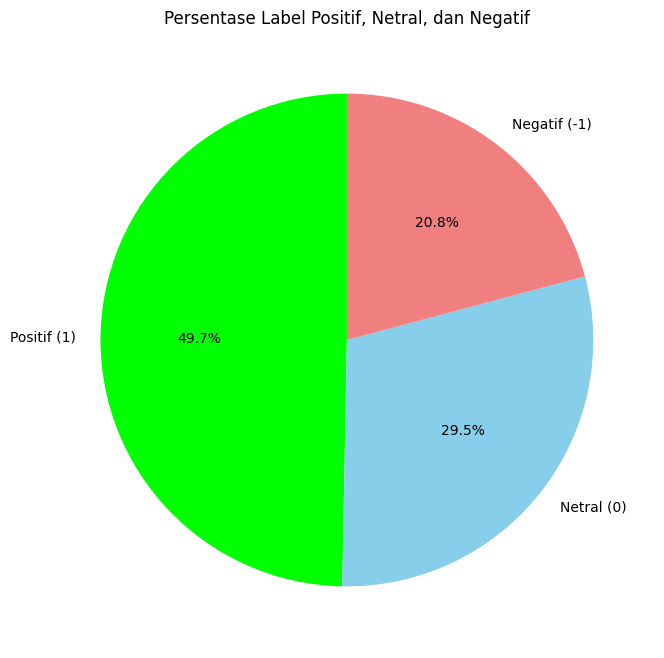

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file Excel
df = pd.read_excel('datapreprocessing.xlsx')

# Membuat pemetaan nilai
mapping = {1: 'Positif (1)', 0: 'Netral (0)', -1: 'Negatif (-1)'}

# Menggunakan fungsi map untuk mengubah nilai dalam kolom
df['kelas'] = df['kelas'].map(mapping)

# Konversi tipe data kolom ke string jika belum
df['kelas'] = df['kelas'].astype(str)

# Check the unique values in the 'kelas' column
print(df['kelas'].unique())

# Buat diagram lingkaran
label_counts = df['kelas'].value_counts()

# Buat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lime', 'skyblue', 'lightcoral'])
plt.title('Persentase Label Positif, Netral, dan Negatif')
plt.show()